https://www.wired.com/story/see-earth-transform-like-youre-a-time-traveling-astronaut/?mbid=social_twitter&utm_brand=wired&utm_medium=social&utm_social-type=owned&utm_source=twitter

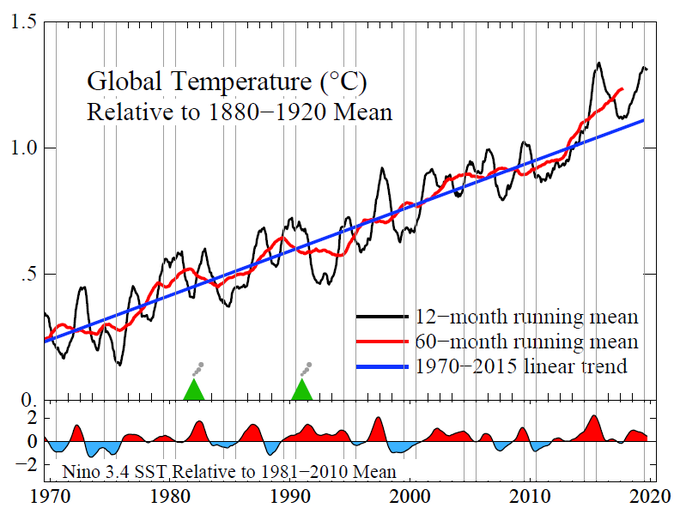





# Histograms
A histogram can fit virtually any shape of distribution, given enough bins. This is the
key—while each bin can be thought of as a simple constant estimator of the density
in that bin, the overall histogram is a piecewise constant estimator which can be
thought of as having a tuning parameter—the number of bins. When the number
of data points is small, the number of bins should somehow be small, as there is not
enough information to warrant many bins. As the number of data points grows, the number of bins should also grow to capture the increasing amount of detail in the
distribution’s shape that having more data points allows. This is a general feature of
nonparametric methods—they are composed of simple pieces, and the number of
pieces grows with the number of data points.
Getting the number of bins right is clearly critical. Pragmatically, it can easily
make the difference between concluding that a distribution has a single mode or
that it has two modes. Intuitively, we expect that a large bin width will destroy fine-
scale features in the data distribution, while a small width will result in increased
counting noise per bin. **We emphasize that it is not necessary to bin the data before
estimating model parameters**.

Various proposed methods for choosing optimal bin width typically suggest a
value proportional to some estimate of the distribution’s scale, and decreasing with
the sample size. The most popular choice is “Scott’s rule” which prescribes a bin
width:

$$\Delta_{b}=\frac{3.5\sigma}{N^{1/3}}$$

where $\sigma$ is the sample standard deviation, and $N$ is the sample size. This rule
asymptotically minimizes the mean integrated square error. andassumes that the underlying distribution is Gaussian. An attempt to
generalize this rule to non-Gaussian distributions is the Freedman–Diaconis rule:

$$\Delta_{b}=\frac{2(q_{75}-q_{25})}{N^{1/3}}=\frac{2.7\sigma}{N^{1/3}}$$

which estimates the scale (“spread”) of the distribution from its interquartile range. In the case of a Gaussian distribution, Scott’s bin width is 30% largerthan the Freedman–Diaconis bin width. Some rules use the extremes of observed values to estimate the scale of the distribution, which is clearly inferior to using the interquartile range when outliers are present.



(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  5.,  3.,  1.,  6.,
         7., 12.,  7., 16., 12., 21., 28., 37., 40., 40., 47., 55., 46.,
        60., 60., 53., 54., 62., 52., 52., 51., 38., 25., 21., 20., 18.,
         8.,  8.,  8., 10.,  5.,  3.,  2.,  2.,  1.,  0.,  1.]),
 array([-4.04524816, -3.90018424, -3.75512032, -3.6100564 , -3.46499248,
        -3.31992856, -3.17486463, -3.02980071, -2.88473679, -2.73967287,
        -2.59460895, -2.44954503, -2.30448111, -2.15941719, -2.01435326,
        -1.86928934, -1.72422542, -1.5791615 , -1.43409758, -1.28903366,
        -1.14396974, -0.99890582, -0.85384189, -0.70877797, -0.56371405,
        -0.41865013, -0.27358621, -0.12852229,  0.01654163,  0.16160555,
         0.30666947,  0.4517334 ,  0.59679732,  0.74186124,  0.88692516,
         1.03198908,  1.177053  ,  1.32211692,  1.46718084,  1.61224477,
         1.75730869,  1.90237261,  2.04743653,  2.19250045,  2.33756437,
         2.48262829,  2.62769221,  2.77275614,  2.91782006,

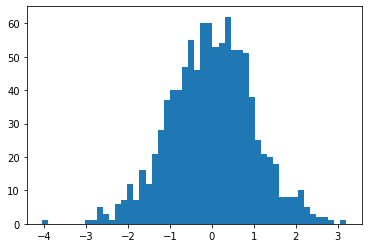

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
x = np . random . normal ( size = 1000)
plt . hist (x , bins = 50)

        Use astropy.visualization.hist instead. [__main__]


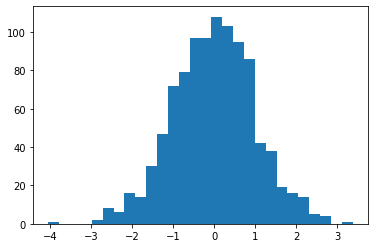

In [ ]:
from astroML . plotting import hist
In [ 7 ] : hist (x , bins = 'freedman') # can also choose
# ' knuth ' or ' scott '

## How to Determine the Histogram Errors?
Assuming that we have selected a bin size, $\Delta_{b}$ , the $N$ values of $x_i$ are sorted into $M$ bins, with the count in each bin $n_k , k = 1, . . . , M$. If we want to express the results as a properly normalized $f(x)$, with the values $f_k$ in each bin, then it is customary to adopt:

$$f_k=\frac{n_k}{N \Delta_b}$$

The unit for $f_k$ is the inverse of the unit for $x_i$. Each estimate of %f_k% comes with some uncertainty. It is customary to assign 
“error bars” for each $n_k$ equal to $\sqrt{n}_k$ and thus the uncertainty of $f_k$ is:

$$\sigma_k=\frac{\sqrt{n_k}}{\Delta_b N}$$

This practice assumes that n k are scattered around the true values in each bin ($\mu$) according to a Gaussian distribution, and that error bars enclose the 68% confidence range for the true value. However, when counts are low this assumption of Gaussianity breaks down and the Poisson distribution should be used instead.

Knuth shows that the best piecewise constant model has the number of bins, $M$, which maximizes the following function (up to an additive constant, this is the logarithm of the posterior probability):

$$F(M|{x_i}, I)=N log(M)+log(\Gamma(M/2))-Mlog(\Gamma(1/2))-log(\Gamma(N+M/2))+\sum_{K=1}^{m}log(\Gamma(n_k+1/2))$$

where $\Gamma$ is the gamma function, and $n_k$ is the number of measurements $x_i, i =
1, . . . , N$, which are found in bin $k, k = 1, . . . , M$. Although this expression is more
involved than the “rules of thumb", it can be easily evaluated for an arbitrary data set.
Knuth derived this equation using Bayesian model selection and treating the histogram as a piecewise constant model of the underlying density function. By assumption, the bin width is constant and the number of bins is the result of model selection. Given the number of bins, M, the model for the underlying pdf is:

$$h(x)=\sum_{k=1}^{M}h_k\Pi(x|x_{k-1},x_k)$$

where the boxcar function $\Pi = 1$ if $x_{k−1} < x ≤ x_k$ , and $0$ otherwise. The $M$ model
parameters, $h_k , k = 1, . . . , M$, are subject to normalization constraints, so that there are only M−1 free parameters. The uninformative prior distribution for {$h_k$} is given by

$$p(h_k|M, I)=\frac{\Gamma(M/2)}{\Gamma(1/2)M}[h_1h_2..h_{M-1}(1-\sum_{k=1}^{M-1}h_k)]^{-1/2}$$

which is known as the Jeffreys prior for the multinomial likelihood. The joint data
likelihood is a multinomial distribution

$$p(x_i|h_k, M, I)\propto h_1^{n_1}h_2^{n_2}...h_M^{n_M}$$

The posterior pdf for model parameters $h_k$ is obtained by multiplying the prior and data likelihood. The posterior probability for the number of bins $M$ is obtained by
marginalizing the posterior pdf over all $h_k$. This marginalization includes a series of
nested integrals over the (M − 1)-dimensional parameter space, and yields $F(M|x_i, I)$;
details can be found in Knuth’s paper.

Knuth also derived the posterior pdf for $h_k$, and summarized it by deriving its
expectation value and variance. The expectation value is:

$$h_k=\frac{n_k+1/2}{N+M/2}$$

which is an interesting result (the naive expectation is $h_k = n_k /N$): even when
there are no counts in a given bin, $n_k = 0$, we still get a nonvanishing estimate
$h_k = 1/(2N + M)$. The reason is that the assumed prior distribution effectively
places one half of a datum in each bin.

# Comparison of different rules for optimal histogram bin width

The number of bins in Knuth’s expression ($h_k$) is defined over the observed data range (i.e., the difference between the maximum and minimum value). Since the observed range generally increases with the sample size, it is not obvious how the optimal bin width varies with it. The variation depends on the actual underlying distribution from which data are drawn, and for a Gaussian distribution numerical
simulations with $N$ up to $10^6$ show that:

$$\Delta_b=\frac{2.7\sigma}{N^{1/4}}$$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:78: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


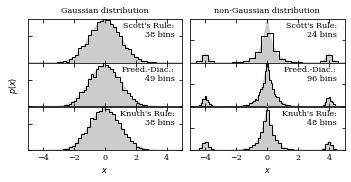

In [ ]:

"""
Selection of Histogram bin size
-------------------------------
Figure 5.20
The results of Scott's rule, the Freedman-Diaconis rule, and Knuth's rule for
selecting the optimal bin width for a histogram. These histograms are based
on 5000 points drawn from the shown pdfs. On the left is a simple normal
distribution. On the right is a Laplacian distribution at the center, with
two small Gaussian peaks added in the wings.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from astropy.visualization import hist

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)


def plot_labeled_histogram(style, data, name,
                           x, pdf_true, ax=None,
                           hide_x=False,
                           hide_y=False):
    if ax is not None:
        ax = plt.axes(ax)

    counts, bins, patches = hist(data, bins=style, ax=ax,
                                 color='k', histtype='step', density=True)
    ax.text(0.95, 0.93, '%s:\n%i bins' % (name, len(counts)),
            transform=ax.transAxes,
            ha='right', va='top')

    ax.fill(x, pdf_true, '-', color='#CCCCCC', zorder=0)

    if hide_x:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    if hide_y:
        ax.yaxis.set_major_formatter(plt.NullFormatter())

    ax.set_xlim(-5, 5)

    return ax


#------------------------------------------------------------
# Set up distributions:
Npts = 5000
np.random.seed(0)
x = np.linspace(-6, 6, 1000)

# Gaussian distribution
data_G = stats.norm(0, 1).rvs(Npts)
pdf_G = stats.norm(0, 1).pdf(x)

# Non-Gaussian distribution
distributions = [stats.laplace(0, 0.4),
                 stats.norm(-4.0, 0.2),
                 stats.norm(4.0, 0.2)]

weights = np.array([0.8, 0.1, 0.1])
weights /= weights.sum()

data_NG = np.hstack(d.rvs(int(w * Npts))
                    for (d, w) in zip(distributions, weights))
pdf_NG = sum(w * d.pdf(x)
             for (d, w) in zip(distributions, weights))

#------------------------------------------------------------
# Plot results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(hspace=0, left=0.07, right=0.95, wspace=0.05, bottom=0.15)
ax = [fig.add_subplot(3, 2, i + 1) for i in range(6)]

# first column: Gaussian distribution
plot_labeled_histogram('scott', data_G, 'Scott\'s Rule', x, pdf_G,
                       ax=ax[0], hide_x=True, hide_y=True)
plot_labeled_histogram('freedman', data_G, 'Freed.-Diac.', x, pdf_G,
                       ax=ax[2], hide_x=True, hide_y=True)
plot_labeled_histogram('knuth', data_G, 'Knuth\'s Rule', x, pdf_G,
                       ax=ax[4], hide_x=False, hide_y=True)

ax[0].set_title('Gaussian distribution')
ax[2].set_ylabel('$p(x)$')
ax[4].set_xlabel('$x$')

# second column: non-gaussian distribution
plot_labeled_histogram('scott', data_NG, 'Scott\'s Rule', x, pdf_NG,
                       ax=ax[1], hide_x=True, hide_y=True)
plot_labeled_histogram('freedman', data_NG, 'Freed.-Diac.', x, pdf_NG,
                       ax=ax[3], hide_x=True, hide_y=True)
plot_labeled_histogram('knuth', data_NG, 'Knuth\'s Rule', x, pdf_NG,
                       ax=ax[5], hide_x=False, hide_y=True)

ax[1].set_title('non-Gaussian distribution')
ax[5].set_xlabel('$x$')

plt.show()

The usefulness of Knuth’s analysis and the result summarized goes beyond finding the optimal bin size. The method is capable of recognizing substructure in data and, for example, it results in $M = 1$ when the data are consistent with a uniform distribution, and suggests more bins for a multimodal distribution
than for a unimodal distribution even when both samples have the same size and $σ_G$.

Lastly, remember that Knuth’s derivation assumed that the uncertainty of each $x_i$ is negligible. When this is not the case, including the case of heteroscedastic errors, techniques introduced in this chapter can be used for general model selection, including the case of a piecewise constant model, as well as varying bin size.



-------------------------------------------------

# Bayesian blocks

Though Knuth’s Bayesian method is an improvement over the rules of thumb, it still has a distinct weakness: it assumes a uniform width for the optimal histogram bins. The Bayesian model used to derive Knuth’s rule suggests that this
limitation could be lifted, by maximizing a well-designed likelihood function over
bins of varying width. This approach has been explored, and dubbed Bayesian blocks. The method was first developed in the field of time-domain analysis, but is readily applicable to histogram data as well.

In the Bayesian blocks formalism, the data are segmented into blocks, with the borders between two blocks being set by changepoints. Using a Bayesian analysis based on Poissonian statistics within each block, an objective function, called the log-likelihood fitness function, can be defined for each block:

$$F(N_i, T_i) = N_i(log(N_i) − log(T_i)),$$

where $N_i$ is the number of points in block i , and $T_i$ is the width of block i (or the
duration, in time-series analysis). Because of the additive nature of log-likelihoods,
the fitness function for any set of blocks is simply the sum of the fitness functions for
each individual block. This feature allows for the configuration space to be explored
quickly using dynamic programming concepts: for more information see https://arxiv.org/abs/1207.5578


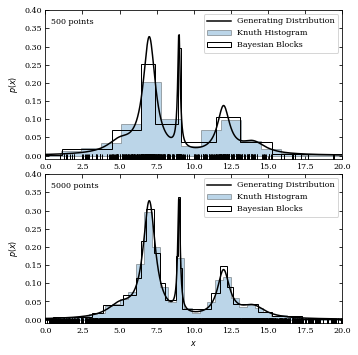

In [ ]:
"""
Distribution Representation Comparison
--------------------------------------
Figure 5.21
Comparison of Knuth's histogram and a Bayesian blocks histogram. The adaptive
bin widths of the Bayesian blocks histogram yield a better representation of
the underlying data, especially with fewer points.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from astropy.visualization import hist

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Generate our data: a mix of several Cauchy distributions
np.random.seed(0)
N = 10000
mu_gamma_f = [(5, 1.0, 0.1),
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]
true_pdf = lambda x: sum([f * stats.cauchy(mu, gamma).pdf(x)
                          for (mu, gamma, f) in mu_gamma_f])
x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N))
                    for (mu, gamma, f) in mu_gamma_f])
np.random.shuffle(x)
x = x[x > -10]
x = x[x < 30]

#------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(bottom=0.08, top=0.95, right=0.95, hspace=0.1)
N_values = (500, 5000)
subplots = (211, 212)

for N, subplot in zip(N_values, subplots):
    ax = fig.add_subplot(subplot)
    xN = x[:N]
    t = np.linspace(-10, 30, 1000)

    # plot the results
    ax.plot(xN, -0.005 * np.ones(len(xN)), '|k')
    hist(xN, bins='knuth', ax=ax, density=True,
         histtype='stepfilled', alpha=0.3,
         label='Knuth Histogram')
    hist(xN, bins='blocks', ax=ax, density=True,
         histtype='step', color='k',
         label="Bayesian Blocks")
    ax.plot(t, true_pdf(t), '-', color='black',
            label="Generating Distribution")

    # label the plot
    ax.text(0.02, 0.95, "%i points" % N, ha='left', va='top',
            transform=ax.transAxes)
    ax.set_ylabel('$p(x)$')
    ax.legend(loc='upper right', prop=dict(size=8))

    if subplot == 212:
        ax.set_xlabel('$x$')

    ax.set_xlim(0, 20)
    ax.set_ylim(-0.01, 0.4001)

plt.show()

we compare a Bayesian blocks segmentation of a data set to a
segmentation using Knuth’s rule. The adaptive bin width of the Bayesian blocks
histogram leads to a better representation of the underlying data, especially when
there are fewer points in the data set. An important feature of this method is that the
bins are optimal in a quantitative sense, meaning that statistical significance can be
attached to the bin configuration. This has led to applications in the field of time-
domain astronomy, especially in signal detection.
Finally, we should mention that the fitness function is just one of
many possible fitness functions that can be used in the Bayesian blocks method.

we can ask whether our data were
drawn from a Gaussian distribution, or from a distribution that can be described as
the sum of two Gaussian distributions. In this case, the number of parameters for the
two competing models is different: two for a single Gaussian, and five for the sum of
two Gaussians. This five-dimensional pdf is hard to treat analytically, and we need
to resort to numerical techniques as described in the next section. After introducing
these techniques, we will return to this model comparison problem.

# Numerical Methods for Complex Problems (MCMC)

When the number of parameters, $k$, in a model, $M(\vec{\theta})$, with the vector of parameters
$\vec{\theta}$ specified by $θ_p, p = 1, . . . , k$, is large, direct exploration of the posterior pdf by exhaustive search becomes impractical, and often impossible. For example, if the grid for computing the posterior pdf, includes only 100 points per coordinate, the five-dimensional model from the
previous example will require on order $10^10$ computations of the posterior pdf. Fortunately, a number of numerical methods exist that utilize more efficient approaches than an exhaustive grid search.

Let us assume that we know how to compute the posterior pdf (we suppress the
vector notation for $\theta$ for notational clarity since in the rest of this section we always discuss multidimensional cases)

$$p(\theta)=p(M(\theta)|D, I)\propto p(D|M(\theta), I)p(\theta|I))$$

In general, we wish to evaluate the multidimensional integral

$$I(\theta)=\int g(\theta)p(\theta)d\theta$$

There are two classes of frequently encountered problems:

- 1. Marginalization and parameter estimation, where we seek the posterior pdf for parameters $\theta_i, i = 1, . . . , P$, and the integral is performed over the space spanned by nuisance parameters $θ_j, j = (P + 1), . . . , k$ (for notational simplicity we assume that the last $k − P$ parameters are nuisance parameters).
In this case, $g (\theta) = 1$. As a special case, we can seek the posterior mean for parameter $\theta_m$ , where $g(\theta) = \theta_m$, and the integral is performed over
all other parameters. Analogously, we can also compute the credible region, defined as the interval that encloses $1 − \alpha$ of the posterior probability. In all of these computations, it is sufficient to evaluate the integral in $I(\theta)$ up to an unknown normalization constant because the posterior pdf can be renormalized to integrate to unity.

- 2. Model comparison, where $g (\theta ) = 1$ and the integral is performed over all
parameters. Unlike the first class of problems, here the proper normalization is mandatory.

One of the simplest numerical integration methods is generic Monte Carlo. We generate a random set of $M$ values $\theta$, $\theta_j, j = 1, . . . , M$, uniformly sampled within
the integration volume $V_{\theta}$ , and estimate the integral as:

$$I \propto \frac{V_{\theta}}{M}\sum_{j=1}^{M}g(\theta_j)p(\theta_j)$$

This method is very inefficient when the integrated function greatly varies within the
integration volume, as is the case for the posterior pdf. This problem is especially
acute with high-dimensional integrals.

A number of methods exist that are much more efficient than generic Monte
Carlo integration. The most popular group of techniques is known as Markov
chain Monte Carlo (MCMC) methods. They return a sample of points, or chain, from the k-dimensional parameter space, with a distribution that is asymptotically proportional to $p(\theta)$. The constant of proportionality is not important in the first class of problems listed above. In model comparison problems, the proportionality constant must be known.

Given such a chain of length $M$, the integral  can be estimated as:

$$ I = \frac{1}{M} \sum_{j=1}^{M} g(\theta_j)$$.

As a simple example, to estimate the expectation value for $\theta_1$ (i.e., $g(\theta) = \theta_1$), we simply take the mean value of all $\theta_1$ in the chain.

Given a Markov chain, quantitative description of the posterior pdf becomes a density estimation problem. To visualize the posterior pdf for parameter $\theta_1$, marginalized over
all other parameters, $\theta_2 , . . . ,\theta_ k$ , we can construct a histogram of all $\theta_1$ values in the chain, and normalize its integral to 1. To get a MAP estimate for $\theta_1$, we find the maximum of this marginalized pdf. A generalization of this approach to multidimensional projections of the parameter space is illustrated.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [log_gamma, mu]
100%|██████████| 13000/13000 [00:11<00:00, 1101.30it/s]


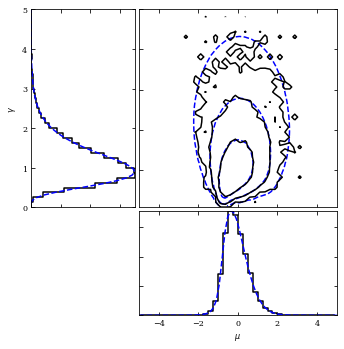

In [ ]:
"""
MCMC for the Cauchy distribution
--------------------------------
Figure 5.22
Markov chain monte carlo (MCMC) estimates of the posterior pdf for parameters
describing the Cauchy distribution. The data are the same as those used in
figure 5.10: the dashed curves in the top-right panel show the results of
direct computation on a regular grid from that diagram. The solid curves are
the corresponding MCMC estimates using 10,000 sample points. The left and the
bottom panels show marginalized distributions.
"""
# Author: Jake VanderPlas (adapted to PyMC3 by Brigitta Sipocz)
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import cauchy
from matplotlib import pyplot as plt
from astroML.plotting.mcmc import convert_to_stdev

import pymc3 as pm

# ----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)


def cauchy_logL(xi, sigma, mu):
    """Equation 5.74: cauchy likelihood"""
    xi = np.asarray(xi)
    n = xi.size
    shape = np.broadcast(sigma, mu).shape

    xi = xi.reshape(xi.shape + tuple([1 for s in shape]))

    return ((n - 1) * np.log(sigma)
            - np.sum(np.log(sigma ** 2 + (xi - mu) ** 2), 0))


# ----------------------------------------------------------------------
# Draw the sample from a Cauchy distribution
np.random.seed(44)
mu_0 = 0
gamma_0 = 2
xi = cauchy(mu_0, gamma_0).rvs(10)

# ----------------------------------------------------------------------
# Set up and run MCMC:
with pm.Model():
    mu = pm.Uniform('mu', -5, 5)
    log_gamma = pm.Uniform('log_gamma', -10, 10)

    # set up our observed variable x
    x = pm.Cauchy('x', mu, np.exp(log_gamma), observed=xi)

    trace = pm.sample(draws=12000, tune=1000, cores=1)

# compute histogram of results to plot below
L_MCMC, mu_bins, gamma_bins = np.histogram2d(trace['mu'],
                                             np.exp(trace['log_gamma']),
                                             bins=(np.linspace(-5, 5, 41),
                                                   np.linspace(0, 5, 41)))
L_MCMC[L_MCMC == 0] = 1E-16  # prevents zero-division errors

# ----------------------------------------------------------------------
# Compute likelihood analytically for comparison
mu = np.linspace(-5, 5, 70)
gamma = np.linspace(0.1, 5, 70)
logL = cauchy_logL(xi, gamma[:, np.newaxis], mu)
logL -= logL.max()

p_mu = np.exp(logL).sum(0)
p_mu /= p_mu.sum() * (mu[1] - mu[0])

p_gamma = np.exp(logL).sum(1)
p_gamma /= p_gamma.sum() * (gamma[1] - gamma[0])

hist_mu, bins_mu = np.histogram(trace['mu'], bins=mu_bins, density=True)
hist_gamma, bins_gamma = np.histogram(np.exp(trace['log_gamma']),
                                      bins=gamma_bins, density=True)


# ----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 5))

# first axis: likelihood contours
ax1 = fig.add_axes((0.4, 0.4, 0.55, 0.55))
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.yaxis.set_major_formatter(plt.NullFormatter())

ax1.contour(mu, gamma, convert_to_stdev(logL),
            levels=(0.683, 0.955, 0.997),
            colors='b', linestyles='dashed')

ax1.contour(0.5 * (mu_bins[:-1] + mu_bins[1:]),
            0.5 * (gamma_bins[:-1] + gamma_bins[1:]),
            convert_to_stdev(np.log(L_MCMC.T)),
            levels=(0.683, 0.955, 0.997),
            colors='k')

# second axis: marginalized over mu
ax2 = fig.add_axes((0.1, 0.4, 0.29, 0.55))
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.plot(hist_gamma, 0.5 * (bins_gamma[1:] + bins_gamma[:-1]
                            - bins_gamma[1] + bins_gamma[0]),
         '-k', drawstyle='steps')
ax2.plot(p_gamma, gamma, '--b')
ax2.set_ylabel(r'$\gamma$')
ax2.set_ylim(0, 5)

# third axis: marginalized over gamma
ax3 = fig.add_axes((0.4, 0.1, 0.55, 0.29))
ax3.yaxis.set_major_formatter(plt.NullFormatter())
ax3.plot(0.5 * (bins_mu[1:] + bins_mu[:-1]), hist_mu,
         '-k', drawstyle='steps-mid')
ax3.plot(mu, p_mu, '--b')
ax3.set_xlabel(r'$\mu$')
plt.xlim(-5, 5)

plt.show()

In [ ]:
!pip install astroML